In [33]:
# ! pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [40]:
df = pd.read_csv('./What_We_Watched_A_Netflix_Engagement_Report_2023Jan-Jun.csv')
df.head()

,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,2023-03-23,"812,100,000"
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"665,100,000"
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"622,800,000"
3,Wednesday: Season 1,Yes,2022-11-23,"507,700,000"
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000"


## Cleaning dataset 

### Cleaning ": Season #" endings 

In [36]:
import re
def clean_title(title):
    # Regular expression to find ": season #" and remove it
    new_title = re.sub(r':\s*season\s*\d+|:\s*chapter(\s*\d+(-\d+)?)?|:\s*volume\s*\d+|//\s*.*?($|\n)', '', title, flags=re.IGNORECASE)
    return new_title

In [41]:
df['Title'] = df['Title'].apply(clean_title)
df.head()

,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent,Yes,2023-03-23,"812,100,000"
1,Ginny & Georgia,Yes,2023-01-05,"665,100,000"
2,The Glory,Yes,2022-12-30,"622,800,000"
3,Wednesday,Yes,2022-11-23,"507,700,000"
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000"


In [38]:
df.to_csv('./result1.csv', index=False)

## Enriched dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

API communication has done for collecting additional information on each movie title throygh OMDB API Key. 

In [2]:
df = pd.read_csv('./raw_enriched_data.csv')
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Year,Rated,Released,Runtime,Genre,Director,...,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Response
0,The Night Agent,Yes,2023-03-23,"812,100,000",2023–,TV-MA,23 Mar 2023,NaN,"Action, Drama, Thriller",NaN,...,2 nominations,https://m.media-amazon.com/images/M/MV5BODgzYm...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.5,"99,566",tt13918776,series,2.0,True
1,Ginny & Georgia,Yes,2023-01-05,"665,100,000",2021–,TV-14,24 Feb 2021,NaN,"Comedy, Drama",NaN,...,Nominated for 1 Primetime Emmy. 3 wins & 6 nom...,https://m.media-amazon.com/images/M/MV5BNmE3Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.5,"77,563",tt10813940,series,2.0,True
2,The Glory,Yes,2022-12-30,"622,800,000",2022–,TV-MA,30 Dec 2022,NaN,"Drama, Mystery, Thriller",NaN,...,4 wins & 1 nomination,https://m.media-amazon.com/images/M/MV5BMjdlNW...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,8.1,"24,846",tt21344706,series,1.0,True
3,Wednesday,Yes,2022-11-23,"507,700,000",2022–,TV-14,23 Nov 2022,NaN,"Comedy, Crime, Fantasy",NaN,...,Nominated for 12 Primetime Emmys. 13 wins & 59...,https://m.media-amazon.com/images/M/MV5BM2ZmMj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,8.1,"342,661",tt13443470,series,2.0,True
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000",2023,TV-MA,04 May 2023,NaN,"Drama, History, Romance",NaN,...,Nominated for 3 Primetime Emmys. 4 wins & 15 n...,https://m.media-amazon.com/images/M/MV5BNWYwNz...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.4,"50,245",tt14661396,series,1.0,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18214 non-null  object 
 1   Available Globally?  18214 non-null  object 
 2   Release Date         4855 non-null   object 
 3   Hours Viewed         18214 non-null  object 
 4   Year                 13308 non-null  object 
 5   Rated                9052 non-null   object 
 6   Released             13065 non-null  object 
 7   Runtime              11689 non-null  object 
 8   Genre                13143 non-null  object 
 9   Director             8446 non-null   object 
 10  Writer               10288 non-null  object 
 11  Actors               12955 non-null  object 
 12  Plot                 12838 non-null  object 
 13  Language             12942 non-null  object 
 14  Country              13012 non-null  object 
 15  Awards               8543 non-null  

### Feature Extraction
extracting all features which we need for the model

In [4]:
training_df = df[['Title', 'Available Globally?', 'Hours Viewed', 'Released', 'Runtime', 'Genre', 'Language', 'Country', 'imdbRating', 'Type', 'totalSeasons', ]]
training_df.head()

,Title,Available Globally?,Hours Viewed,Released,Runtime,Genre,Language,Country,imdbRating,Type,totalSeasons
0,The Night Agent,Yes,"812,100,000",23 Mar 2023,NaN,"Action, Drama, Thriller",English,United States,7.5,series,2.0
1,Ginny & Georgia,Yes,"665,100,000",24 Feb 2021,NaN,"Comedy, Drama",English,United States,7.5,series,2.0
2,The Glory,Yes,"622,800,000",30 Dec 2022,NaN,"Drama, Mystery, Thriller",Korean,South Korea,8.1,series,1.0
3,Wednesday,Yes,"507,700,000",23 Nov 2022,NaN,"Comedy, Crime, Fantasy",English,United States,8.1,series,2.0
4,Queen Charlotte: A Bridgerton Story,Yes,"503,000,000",04 May 2023,NaN,"Drama, History, Romance",English,United States,7.4,series,1.0


In [5]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18214 non-null  object 
 1   Available Globally?  18214 non-null  object 
 2   Hours Viewed         18214 non-null  object 
 3   Released             13065 non-null  object 
 4   Runtime              11689 non-null  object 
 5   Genre                13143 non-null  object 
 6   Language             12942 non-null  object 
 7   Country              13012 non-null  object 
 8   imdbRating           12525 non-null  float64
 9   Type                 13308 non-null  object 
 10  totalSeasons         4333 non-null   float64
dtypes: float64(2), object(9)
memory usage: 1.5+ MB


## Data Cleaning
Cleaning all rows and solve all null values

In [6]:
new_column_names = {'Title': 'movie_title',
                    'Available Globally?': 'available_globally',
                    'Hours Viewed': 'viewing_hours', 'Released': 'release_date',' Runtime': 'runtime','Genre': 'genre','Language': 'language','Country': 'country','imdbRating': 'imdb_rating','Type': 'type','totalSeasons': 'total_seasons'}

training_df = training_df.rename(columns=new_column_names)
# training_df = training_df.rename(columns={'viewing_time': 'viewing_hours'})
training_df.head()

,movie_title,available_globally,viewing_hours,release_date,Runtime,genre,language,country,imdb_rating,type,total_seasons
0,The Night Agent,Yes,"812,100,000",23 Mar 2023,NaN,"Action, Drama, Thriller",English,United States,7.5,series,2.0
1,Ginny & Georgia,Yes,"665,100,000",24 Feb 2021,NaN,"Comedy, Drama",English,United States,7.5,series,2.0
2,The Glory,Yes,"622,800,000",30 Dec 2022,NaN,"Drama, Mystery, Thriller",Korean,South Korea,8.1,series,1.0
3,Wednesday,Yes,"507,700,000",23 Nov 2022,NaN,"Comedy, Crime, Fantasy",English,United States,8.1,series,2.0
4,Queen Charlotte: A Bridgerton Story,Yes,"503,000,000",04 May 2023,NaN,"Drama, History, Romance",English,United States,7.4,series,1.0


In [7]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         18214 non-null  object 
 1   available_globally  18214 non-null  object 
 2   viewing_hours       18214 non-null  object 
 3   release_date        13065 non-null  object 
 4   Runtime             11689 non-null  object 
 5   genre               13143 non-null  object 
 6   language            12942 non-null  object 
 7   country             13012 non-null  object 
 8   imdb_rating         12525 non-null  float64
 9   type                13308 non-null  object 
 10  total_seasons       4333 non-null   float64
dtypes: float64(2), object(9)
memory usage: 1.5+ MB


In [8]:
training_df.isnull().sum()

movie_title               0
available_globally        0
viewing_hours             0
release_date           5149
Runtime                6525
genre                  5071
language               5272
country                5202
imdb_rating            5689
type                   4906
total_seasons         13881
dtype: int64

### available_globaly

Converting Yes/No to binary numbers 1/0

In [9]:
training_df['available_globally'] = training_df['available_globally'].map({'Yes': 1, 'No': 0})

In [10]:
training_df.head()

,movie_title,available_globally,viewing_hours,release_date,Runtime,genre,language,country,imdb_rating,type,total_seasons
0,The Night Agent,1,"812,100,000",23 Mar 2023,NaN,"Action, Drama, Thriller",English,United States,7.5,series,2.0
1,Ginny & Georgia,1,"665,100,000",24 Feb 2021,NaN,"Comedy, Drama",English,United States,7.5,series,2.0
2,The Glory,1,"622,800,000",30 Dec 2022,NaN,"Drama, Mystery, Thriller",Korean,South Korea,8.1,series,1.0
3,Wednesday,1,"507,700,000",23 Nov 2022,NaN,"Comedy, Crime, Fantasy",English,United States,8.1,series,2.0
4,Queen Charlotte: A Bridgerton Story,1,"503,000,000",04 May 2023,NaN,"Drama, History, Romance",English,United States,7.4,series,1.0


### viewing_hours

Converting formatted string to the int numbers

In [11]:
# Replace the commas and convert the column to integers
training_df['viewing_hours'] = training_df['viewing_hours'].str.replace(',', '').astype(int)

### release_date (release_month)
Extracting months out of each release date to have release month instead, and converting string values to numbers

In [12]:
# Convert the release_date column to datetime and extract the month directly
training_df['release_date'] = pd.to_datetime(training_df['release_date'], errors='coerce', format='%d %b %Y').dt.month

In [13]:
training_df.rename(columns={'release_date': 'release_month'}, inplace=True)

Filling null values with median of the data

In [14]:
# Impute with median
median_month = training_df['release_month'].median()
training_df['release_month'].fillna(median_month, inplace=True)

In [15]:
training_df['release_month'] = training_df['release_month'].astype(int)

### runtime 
cleaning, formating and null handeling

In [16]:
# correction in columns name
training_df.rename(columns={'Runtime': 'runtime'}, inplace=True)

In [17]:
# Use a regular expression to remove non-numeric characters (except NaN values)
training_df['runtime'] = training_df['runtime'].str.extract('(\d+)', expand=False)

# Convert to numeric (Int64 to handle NaN)
training_df['runtime'] = pd.to_numeric(training_df['runtime'], errors='coerce', downcast='integer')

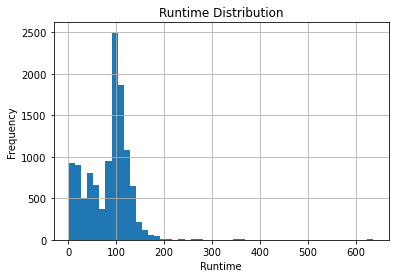

In [18]:
import matplotlib.pyplot as plt

# Assuming 'runtime' column is already converted to numeric
training_df['runtime'].dropna().hist(bins=50)
plt.title('Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

The histogram shows the runtime values are skewed to the right, as a resutl, choosing median for filling null values would be a better option. We take this strategy as follow: 
- take median for all titles which are 'movie' 
- take median for all titles which are 'series'
- a global median for all titles which thier type is undefined 

In [19]:
# Filter out rows where either runtime or type is null
runtime_type_df = training_df.dropna(subset=['runtime', 'type'])

# Calculate median/mean runtime for movies and series
median_runtime_movie = runtime_type_df[runtime_type_df['type'] == 'movie']['runtime'].median()
median_runtime_series = runtime_type_df[runtime_type_df['type'] == 'series']['runtime'].median()
mean_runtime_movie = runtime_type_df[runtime_type_df['type'] == 'movie']['runtime'].mean()
mean_runtime_series = runtime_type_df[runtime_type_df['type'] == 'series']['runtime'].mean()

In [20]:
# Function to impute runtime
def impute_runtime(row):
    if pd.isna(row['runtime']):
        if row['type'] == 'movie':
            return median_runtime_movie
        elif row['type'] == 'series':
            return median_runtime_series
        else:
            # Handle rows where both runtime and type are null
            # You can choose to return a global median/mean or some other placeholder value
            return global_median_runtime  # Or other logic
    else:
        return row['runtime']

# Apply the function
global_median_runtime = training_df['runtime'].median()  # Global median if both runtime and type are null
training_df['runtime'] = training_df.apply(impute_runtime, axis=1)


In [21]:
training_df['runtime'] = training_df['runtime'].astype(int)

In [54]:
print('global median: ' + str(global_median_runtime))
print('movie median: ' + str(median_runtime_movie))
print('series median: ' + str(median_runtime_series))
print('movie mean: ' + str(mean_runtime_movie))
print('series mean: ' + str(mean_runtime_series))

global median: 93.0
movie median: 102.0
series median: 30.0
movie mean: 101.874715261959
series mean: 35.691756272401435


**Bining the runtime column**: Using bining, the categorizing different runtimes for better classification and ease of model usage. Normally, people dob't know how much exactly a motion picture would be in time, but usually have a estimation. 

- Short: less than 30 min (typically short episodes)
- Medium: 30-60 min (typical TV episodes)
- Medium Long: 60-90 min (long TV episods and short movies)
- Feature Length: 90-120 min (standard movie length)
- Long: more than 120 min (long movies or multiple episodes viewed consecutively)

In [23]:
bins = [0, 30, 60, 90, 120, training_df['runtime'].max()]
labels = ['Short', 'Medium', 'Medium Long','Feature Long', 'Long']

runtime_col_index = training_df.columns.get_loc('runtime') + 1  # get the index and add 1
runtime_categories = pd.cut(training_df['runtime'], bins=bins, labels=labels)
training_df.insert(runtime_col_index, 'runtime_category', runtime_categories)

### genre
A title can be available in multiple genres

Filling all null cells with "Other"

In [24]:
# Replace null values in 'genre' with a placeholder like 'Unknown'
training_df['genre'].fillna('Unknown', inplace=True)
training_df['language'].replace('N/A', 'Unknown', inplace=True)

Extracting all available genres in the dataset

In [25]:
# Split the genres by comma into lists
split_genres = training_df['genre'].str.split(', ')

# Flatten the list of lists into a single list of genres
flat_genres = [genre for sublist in split_genres.dropna() for genre in sublist]

# Get the unique genres by converting the list to a set, then back to a list
unique_single_genres = list(set(flat_genres))

print(unique_single_genres)


['Drama', 'Action', 'Fantasy', 'Mystery', 'Talk-Show', 'Unknown', 'News', 'War', 'Film-Noir', 'Horror', 'Crime', 'Thriller', 'Romance', 'Musical', 'Reality-TV', 'Biography', 'Comedy', 'Short', 'Sci-Fi', 'Western', 'History', 'Adventure', 'Documentary', 'Music', 'Family', 'Adult', 'Game-Show', 'Animation', 'Sport']


Binary encoding per genre

In [26]:
# Initialize columns for each unique genre with default value 0
for genre in unique_single_genres:
    training_df[genre] = 0

# Iterate over the DataFrame to update genre columns
for index, row in training_df.iterrows():
    # Split the genre string into a list
    genres_list = row['genre'].split(', ')
    # Update corresponding genre columns to 1
    for genre in genres_list:
        training_df.at[index, genre] = 1

In [27]:
# List of genre columns
genre_columns = [
    'History', 'Action', 'Short', 'Unknown', 'Family', 'Adventure', 'Adult', 
    'Sci-Fi', 'Reality-TV', 'Music', 'Drama', 'Comedy', 'Sport', 'Talk-Show', 
    'Film-Noir', 'Animation', 'War', 'Western', 'Thriller', 'Biography', 
    'Documentary', 'Game-Show', 'Horror', 'Fantasy', 'Musical', 'News', 
    'Crime', 'Romance', 'Mystery'
]

# Dictionary for renaming columns
rename_dict = {col: 'gn_' + col.lower() for col in genre_columns}

# Rename the columns
training_df.rename(columns=rename_dict, inplace=True)

### language
A title can be available in multiple languages

In [28]:
# Replace null values in 'genre' with a placeholder like 'Unknown'
training_df['language'].fillna('Other', inplace=True)
training_df['language'].replace('N/A', 'Other', inplace=True)
training_df['language'].replace('Unknown', 'Other', inplace=True)
training_df['language'].replace('None', 'Other', inplace=True)

In [29]:
# Split the languages by comma into lists
split_language = training_df['language'].str.split(', ')

# Flatten the list of lists into a single list of language
flat_language = [language for sublist in split_language.dropna() for language in sublist]

# Get the unique language by converting the list to a set, then back to a list
unique_single_language = list(set(flat_language))

print(unique_single_language)

['Brazilian Sign ', 'Indonesian', 'French', 'Afrikaans', 'Hindi', 'Dinka', 'Slovenian', 'Esperanto', 'Swahili', 'Malay', 'Latvian', 'Kikuyu', 'Kannada', 'North American Indian', 'Estonian', 'Bengali', 'Hokkien', 'Luxembourgish', 'Norse', 'Urdu', 'Ancient (to 1453)', 'Ukrainian Sign ', 'Bambara', 'Sioux', 'Azerbaijani', 'Amharic', 'Dutch', 'Bosnian', 'Russian', 'Albanian', 'Italian', 'Klingon', 'Turkish', 'Central Khmer', 'Chinese', 'Croatian', 'Swiss German', 'Arabic', 'Lithuanian', 'Tupi', 'Yiddish', 'Tibetan', 'Min Nan', 'Danish', 'Serbo-Croatian', 'Inuktitut', 'Saami', 'Georgian', 'Icelandic', 'Ibo', 'Marshallese', 'Telugu', 'Lingala', 'Burmese', 'Scots', 'Minangkabau', 'Quenya', 'Vietnamese', 'Thai', 'Washoe', 'Pawnee', 'Awadhi', 'Fon', 'Irish Gaelic', 'Chaozhou', 'Turkmen', 'Maya', 'Punjabi', 'Sotho', 'Guarani', 'Cornish', 'Catalan', 'Egyptian (Ancient)', 'Bable', 'Hungarian', 'Other', 'Zulu', 'British Sign ', 'Malayalam', 'Shoshoni', 'Filipino', 'Lao', 'Nepali', 'Cantonese', 'Eng

Identify the most frequent languages

In [30]:
from collections import Counter
import pandas as pd

# Split the languages and flatten the list
all_languages = training_df['language'].str.split(', ').sum()

# Count the occurrences of each language
language_counts = Counter(all_languages)

# Get the five most common languages
top_five_languages = language_counts.most_common(5)

print(top_five_languages)


[('English', 7867), ('Other', 5293), ('Spanish', 1305), ('Japanese', 1232), ('French', 906)]


Binary encoding for all available languages based on top five most frequent languages

In [31]:
# List of top five languages
top_languages = ['English', 'Other', 'Spanish', 'Japanese', 'French']

# Initialize columns for top languages with 0
for lang in top_languages:
    training_df[lang] = 0

# Update the binary columns based on language presence
for index, row in training_df.iterrows():
    if pd.notna(row['language']):
        # Split the languages in the row
        languages_in_row = row['language'].split(', ')
        # Update columns if the language is in the row
        for lang in languages_in_row:
            if lang in top_languages:
                training_df.at[index, lang] = 1
            else:
                training_df.at[index, 'Other'] = 1


In [32]:
training_df.rename(columns={'English': 'lg_english', 'Other': 'lg_other', 'Spanish': 'lg_spanish', 'Japanese': 'lg_japanese', 'French': 'lg_french'}, inplace=True)

### country

Fill null values with 'Other'

In [33]:
training_df['country'] = df['Country']

In [34]:
# Replace null values in 'genre' with a placeholder like 'Unknown'
training_df['country'].fillna('Other', inplace=True)
training_df['country'].replace('N/A', 'Other', inplace=True)

In [35]:
training_df.head()

,movie_title,available_globally,viewing_hours,release_month,runtime,runtime_category,genre,language,country,imdb_rating,...,gn_family,gn_adult,gn_game-show,gn_animation,gn_sport,lg_english,lg_other,lg_spanish,lg_japanese,lg_french
0,The Night Agent,1,812100000,3,30,Short,"Action, Drama, Thriller",English,United States,7.5,...,0,0,0,0,0,1,0,0,0,0
1,Ginny & Georgia,1,665100000,2,30,Short,"Comedy, Drama",English,United States,7.5,...,0,0,0,0,0,1,0,0,0,0
2,The Glory,1,622800000,12,30,Short,"Drama, Mystery, Thriller",Korean,South Korea,8.1,...,0,0,0,0,0,0,1,0,0,0
3,Wednesday,1,507700000,11,30,Short,"Comedy, Crime, Fantasy",English,United States,8.1,...,0,0,0,0,0,1,0,0,0,0
4,Queen Charlotte: A Bridgerton Story,1,503000000,5,30,Short,"Drama, History, Romance",English,United States,7.4,...,0,0,0,0,0,1,0,0,0,0


List all available counteries 

In [36]:
# Split the country by comma into lists
split_country = training_df['country'].str.split(', ')

# Flatten the list of lists into a single list of country
flat_country = [country for sublist in split_country.dropna() for country in sublist]

# Get the unique country by converting the list to a set, then back to a list
unique_single_country = list(set(flat_country))

print(unique_single_country)

['West Germany', 'Haiti', 'Ghana', 'Serbia and Montenegro', 'Australia', 'Burkina Faso', 'Laos', 'France', 'Russia', 'Andorra', 'Saudi Arabia', 'Luxembourg', 'Portugal', 'Brunei', 'Georgia', 'Syria', 'Serbia', 'Poland', 'Yugoslavia', 'Germany', 'Ukraine', 'Ecuador', 'Cyprus', 'Bahamas', 'Qatar', 'Ethiopia', 'Libya', 'Latvia', 'Kazakhstan', 'East Germany', 'Maldives', 'Liechtenstein', 'Romania', 'Iran', 'Estonia', 'Angola', 'Guinea', 'Nigeria', 'United Kingdom', 'UK', 'Antarctica', 'Cambodia', 'Montenegro', 'Sweden', 'Canada', 'Belgium', 'Czech Republic', 'Sierra Leone', 'Jordan', 'Argentina', 'United States', 'China', 'Paraguay', 'Norway', 'India', 'Thailand', 'Singapore', 'Lithuania', 'Chile', 'Bermuda', 'Tanzania', 'Kenya', 'Dominican Republic', 'Kuwait', 'Colombia', 'Pakistan', 'Hungary', 'Venezuela', 'Madagascar', 'Other', 'Mauritius', 'Denmark', 'Israel', 'Japan', 'Djibouti', 'Bhutan', 'Occupied Palestinian Territory', 'Myanmar', 'The Democratic Republic of Congo', 'Zambia', 'Spai

Get the most 5 frequent counteries 

In [37]:
from collections import Counter
import pandas as pd

# Split the country and flatten the list
split_country = training_df['country'].str.split(', ')
flat_country = [country for sublist in split_country.dropna() for country in sublist]

# Count the occurrences of each country
country_counts = Counter(flat_country)

# Get the five most common countries
top_five_country = country_counts.most_common(10)

print(top_five_country)

[('United States', 5436), ('Other', 5202), ('United Kingdom', 1428), ('Japan', 1165), ('South Korea', 770), ('France', 759), ('Canada', 758), ('India', 633), ('Germany', 621), ('Spain', 431)]


Binary encoding for countary names, by selecting only the 5 most frequent counteries, and consider other counteries as 'Other'. 

In [38]:
# List of top five country
top_country = ['United States', 'Other', 'United Kingdom', 'Japan', 'France']

# Initialize columns for top country with 0
for country in top_country:
    training_df[country] = 0

# Update the binary columns based on country presence
for index, row in training_df.iterrows():
    if pd.notna(row['country']):
        # Split the country in the row
        country_in_row = row['country'].split(', ')
        # Update columns if the country is in the row
        for country in country_in_row:
            if country in top_country:
                training_df.at[index, country] = 1
            else:
                training_df.at[index, 'Other'] = 1

In [39]:
training_df.rename(columns={'United States': 'ct_united_states', 'Other': 'ct_other', 'United Kingdom': 'ct_united_kingdom', 'Japan': 'ct_japan', 'France': 'ct_france'}, inplace=True)

### imdb_rating

Plotting a histogram of the imdb_rating frequency.

In [40]:
training_df['imdb_rating'] = df['imdbRating']

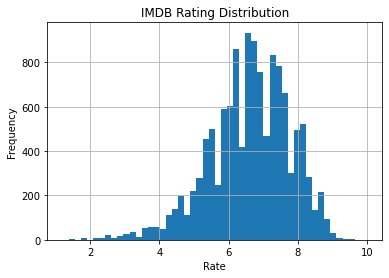

In [41]:
# Assuming 'runtime' column is already converted to numeric
training_df['imdb_rating'].dropna().hist(bins=50)
plt.title('IMDB Rating Distribution')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

Mean and median imputation method

In [42]:
'''
# Calculate mean and median of imdb_rating
mean_rating = training_df['imdb_rating'].mean()
median_rating = training_df['imdb_rating'].median()

# Impute missing values with the mean or median
# Using mean
training_df['imdb_rating'].fillna(median_rating, inplace=True)
training_df['country'].replace('N/A', median_rating, inplace=True)
'''

"\n# Calculate mean and median of imdb_rating\nmean_rating = training_df['imdb_rating'].mean()\nmedian_rating = training_df['imdb_rating'].median()\n\n# Impute missing values with the mean or median\n# Using mean\ntraining_df['imdb_rating'].fillna(median_rating, inplace=True)\ntraining_df['country'].replace('N/A', median_rating, inplace=True)\n"

K-Nearest neighbors imputation method

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the IterativeImputer
mice_imputer = IterativeImputer()

# Again, use only numeric data
numeric_df = training_df.select_dtypes(include=[np.number])

# Fit the imputer and transform the data
imputed_data = mice_imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns, index=training_df.index)

# Replace the old 'imdb_rating' with the imputed values
training_df['imdb_rating'] = imputed_df['imdb_rating']

Multiple Imputation by Chained Equations (MICE):


In [44]:
'''
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the IterativeImputer
mice_imputer = IterativeImputer()

# Again, use only numeric data
numeric_df = training_df.select_dtypes(include=[np.number])

# Fit the imputer and transform the data
imputed_data = mice_imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns, index=training_df.index)

# Replace the old 'imdb_rating' with the imputed values
training_df['imdb_rating'] = imputed_df['imdb_rating']
'''

"\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\n\n# Initialize the IterativeImputer\nmice_imputer = IterativeImputer()\n\n# Again, use only numeric data\nnumeric_df = training_df.select_dtypes(include=[np.number])\n\n# Fit the imputer and transform the data\nimputed_data = mice_imputer.fit_transform(numeric_df)\nimputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns, index=training_df.index)\n\n# Replace the old 'imdb_rating' with the imputed values\ntraining_df['imdb_rating'] = imputed_df['imdb_rating']\n"

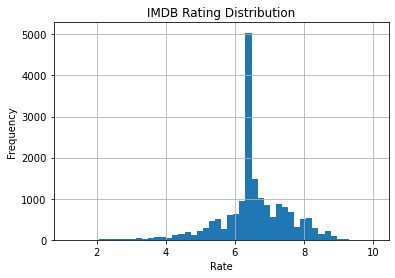

In [45]:
# Assuming 'runtime' column is already converted to numeric
training_df['imdb_rating'].dropna().hist(bins=50)
plt.title('IMDB Rating Distribution')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

### type

In [46]:
training_df['type'].unique()

array(['series', nan, 'movie'], dtype=object)

In [47]:
def encode_type(row):
    if pd.isnull(row['type']):
        return 'movie' if row['runtime'] > 75 else 'series'
    return row['type']

training_df['type'] = training_df.apply(encode_type, axis=1)

Encoding the type:
- movie = 0
- series = 1

In [48]:
type_mapping = {'movie': 0, 'series': 1}

# Apply the mapping to the 'type' column
training_df['type_encoded'] = training_df['type'].map(type_mapping)

### total_seasons

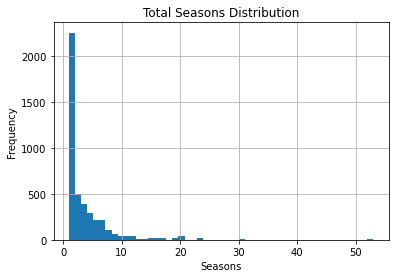

In [49]:
training_df['total_seasons'].dropna().hist(bins=50)
plt.title('Total Seasons Distribution')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.show()

In [50]:
training_df['total_seasons'].fillna(1, inplace=True)
training_df['total_seasons'].replace('N/A', 1, inplace=True)

In [51]:
training_df.to_csv('./clean_enriched_data.csv', index=False)

In [52]:
training_df.isnull().sum()

movie_title           0
available_globally    0
viewing_hours         0
release_month         0
runtime               0
runtime_category      0
genre                 0
language              0
country               0
imdb_rating           0
type                  0
total_seasons         0
gn_drama              0
gn_action             0
gn_fantasy            0
gn_mystery            0
gn_talk-show          0
gn_unknown            0
gn_news               0
gn_war                0
gn_film-noir          0
gn_horror             0
gn_crime              0
gn_thriller           0
gn_romance            0
gn_musical            0
gn_reality-tv         0
gn_biography          0
gn_comedy             0
gn_short              0
gn_sci-fi             0
gn_western            0
gn_history            0
gn_adventure          0
gn_documentary        0
gn_music              0
gn_family             0
gn_adult              0
gn_game-show          0
gn_animation          0
gn_sport              0
lg_english      

In [53]:
training_df.head(20)

,movie_title,available_globally,viewing_hours,release_month,runtime,runtime_category,genre,language,country,imdb_rating,...,lg_other,lg_spanish,lg_japanese,lg_french,ct_united_states,ct_other,ct_united_kingdom,ct_japan,ct_france,type_encoded
0,The Night Agent,1,812100000,3,30,Short,"Action, Drama, Thriller",English,United States,7.500000,...,0,0,0,0,1,0,0,0,0,1
1,Ginny & Georgia,1,665100000,2,30,Short,"Comedy, Drama",English,United States,7.500000,...,0,0,0,0,1,0,0,0,0,1
2,The Glory,1,622800000,12,30,Short,"Drama, Mystery, Thriller",Korean,South Korea,8.100000,...,1,0,0,0,0,1,0,0,0,1
3,Wednesday,1,507700000,11,30,Short,"Comedy, Crime, Fantasy",English,United States,8.100000,...,0,0,0,0,1,0,0,0,0,1
4,Queen Charlotte: A Bridgerton Story,1,503000000,5,30,Short,"Drama, History, Romance",English,United States,7.400000,...,0,0,0,0,1,0,0,0,0,1
5,You,1,440600000,9,45,Medium,"Crime, Drama, Romance",English,United States,7.700000,...,0,0,0,0,1,0,0,0,0,1
6,La Reina del Sur,0,429600000,2,378,Long,"Action, Crime, Drama","Spanish, Arabic, Russian, English","Mexico, United States, Spain, Colombia",7.900000,...,1,1,0,0,1,1,0,0,0,1
7,Outer Banks,1,402500000,4,50,Medium,"Action, Crime, Drama",English,United States,7.500000,...,0,0,0,0,1,0,0,0,0,1
8,Ginny & Georgia,1,302100000,2,30,Short,"Comedy, Drama",English,United States,7.500000,...,0,0,0,0,1,0,0,0,0,1
9,FUBAR,1,266200000,5,30,Short,"Action, Adventure, Comedy",English,United States,6.500000,...,0,0,0,0,1,0,0,0,0,1
